# Marketing Analysis

## Context

This data set was provided to students for their final project in order to test their statistical analysis skills as part of a MSc. in Business Analytics.

It can be utilized for EDA, Statistical Analysis, and Visualizations. For more specific guidance on how to utilize this data set.
## Content

The data set marketing_data.csv consists of 2,240 customers of XYZ company with data on:

* Customer profiles
* Product preferences
* Campaign successes/failures
* Channel performance

This code looks at understanding the marketing data for the store. It will look at Exploratory Data Analysis of Marketing Data currently

In [1]:
#loading library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

reading the data viewing the first 5 rows shape of the dataframe describe statistics

In [212]:
marketing_Data=pd.read_csv("marketing_data.csv")
marketing_Data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [213]:
marketing_Data.columns.values

array(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response',
       'Complain', 'Country'], dtype=object)

In [214]:
marketing_Data.shape

(2240, 28)

In [215]:
marketing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

# handling of null values and outliers

there will be checking and cleaning of null values

In [8]:
marketing_Data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [216]:
# Converting the value of Income column into float type
marketing_Data[' Income '] = marketing_Data[' Income '].str.replace(',', '').str.replace('$', '').astype(float)
marketing_Data[' Income ']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name:  Income , Length: 2240, dtype: float64

In [217]:
#removing unwanted data value
md = marketing_Data.drop(['ID', 'Dt_Customer'], axis=1)

In [218]:
#handling null  for income
md[' Income '] = md[' Income '].fillna(md[' Income '].median())

Finding lower and higher Outliers

In [219]:
def find_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    #df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]  
    print('the outleirs of the column {} '.format(col_name))
    print('Lower fence :{}'.format(fence_low))
    print('')
    print(' number of the lower outliers------->')
    print(df_in.loc[df_in[' Income ']<fence_low, col_name].count())
    print('')
    print('Higher fence : {}'.format(fence_high))
    print('number of the higher outliers------->')
    print(df_in.loc[df_in[' Income ']>fence_high, col_name].count())
        

In [220]:
find_outlier(md, ' Income ')

the outleirs of the column  Income  
Lower fence :-13587.75

 number of the lower outliers------->
0

Higher fence : 117416.25
number of the higher outliers------->
8


In [221]:
#handling outliers  for income 
md.loc[md[' Income ']>117416.25, ' Income '] = md[' Income '].median()

# Data Visualisation¶

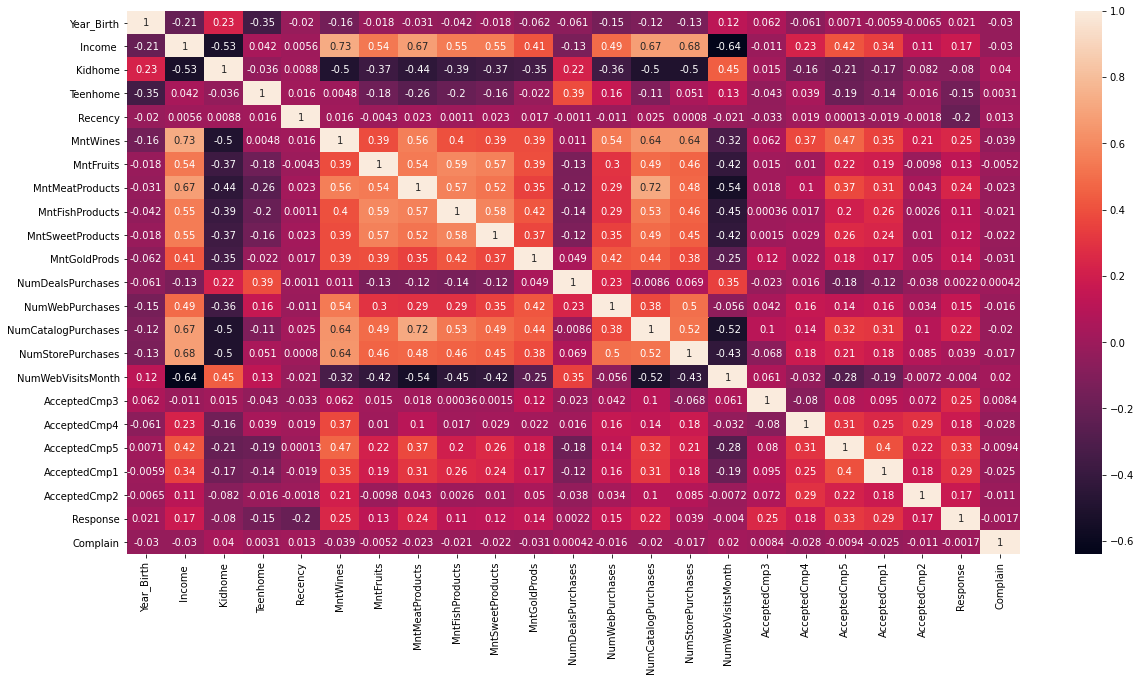

In [222]:
#correlation visualations
plt.figure(figsize=(20,10))
sns.heatmap(md.corr(),annot=True)
plt.show()

# which is the most successful campaign?

In [224]:
md[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100

AcceptedCmp1     6.428571
AcceptedCmp2     1.339286
AcceptedCmp3     7.276786
AcceptedCmp4     7.455357
AcceptedCmp5     7.276786
Response        14.910714
dtype: float64

In [225]:
campaign_success = pd.DataFrame(md[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()
campaign_success

,index,Percent
0,AcceptedCmp1,6.428571
1,AcceptedCmp2,1.339286
2,AcceptedCmp3,7.276786
3,AcceptedCmp4,7.455357
4,AcceptedCmp5,7.276786
5,Response,14.910714


Text(0.5, 1.0, 'Marketing campaign success rate')

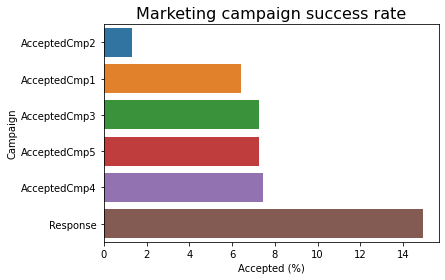

In [226]:
campaign_success = pd.DataFrame(md[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()
sns.barplot(x='Percent', y='index', data=campaign_success.sort_values('Percent'))
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16)

it seems that the recent campaign is the most successful campaign. while the campaign number 2 is least accepted

# Country wise successful campaigns

In [20]:
from IPython.display import display
from colorama import Fore
import warnings
warnings.filterwarnings('ignore')

In [21]:
marketing_Data.groupby(['Country'])[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum().style.background_gradient(cmap=plt.get_cmap('Blues'))

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Country,,,,,,
AUS,7,0,9,6,13,23
CA,18,6,18,24,21,38
GER,7,2,10,11,8,17
IND,7,2,13,11,6,13
ME,0,0,1,0,0,2
SA,20,4,21,20,21,52
SP,78,16,83,89,89,176
US,7,0,8,6,5,13


SP has the highest acceptance of the campigns while it seems ME has the least acceptance

# "Marital Status" wise successful campaigns

In [174]:
marketing_Data.groupby(['Marital_Status'])[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum().style.background_gradient(cmap=plt.get_cmap('Blues'))

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Marital_Status,,,,,,
Absurd,1,0,0,0,1,1
Alone,0,0,1,0,0,1
Divorced,12,5,20,18,13,48
Married,63,7,63,63,66,98
Single,31,5,38,33,31,106
Together,32,12,37,43,44,60
Widow,5,1,4,10,8,19
YOLO,0,0,0,0,0,1


'Married'  has the highest acceptance of the campigns

# "Kidhome" wise successful campaigns

In [175]:
marketing_Data.groupby(['Kidhome'])[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum().style.background_gradient(cmap=plt.get_cmap('Blues'))

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Kidhome,,,,,,
0,133,28,87,144,155,222
1,9,2,75,23,8,110
2,2,0,1,0,0,2


People without kinderen have the highest acceptance of the campigns while it seems people with 2 kinderen has the least acceptance

# "NumWebPurchases" wise successful campaigns

In [241]:
marketing_Data.groupby(['NumWebPurchases'])[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum().style.background_gradient(cmap=plt.get_cmap('Blues'))

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
NumWebPurchases,,,,,,
0,0,0,1,1,0,1
1,0,2,36,1,0,21
2,8,6,16,15,8,30
3,9,1,18,19,15,54
4,28,5,17,24,34,42
5,28,7,18,27,38,58
6,26,2,12,17,24,29
7,21,2,20,23,21,45
8,7,0,6,19,9,17


Amounts between 4 en 7 have the highest acceptance of the campigns

# "Teenhome" wise successful campaigns

In [243]:
marketing_Data.groupby(['Teenhome'])[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum().style.background_gradient(cmap=plt.get_cmap('Blues'))

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Teenhome,,,,,,
0,115,18,98,76,144,237
1,27,11,61,85,16,92
2,2,1,4,6,3,5


People without teenager have the highest acceptance of the campigns 